In [39]:
import numpy as nu
import sympy as sy
import pandas as pa
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# VALOR DE X y Y

## X = FACTOR DE CARGA DE LA DISTRIBUCIÓN DE CORREAS Y LOS MATERIALES.
## Y = FACTOR DE AMPLITUD DEBIDO A CARGA VIVA Y DE VIENTO.

codigo = [ 2, 1, 8, 4, 0, 2, 5 ]
X = sum (codigo)
Y = X/3

# $1\.\  Datos\$

In [5]:
# Para las condiciones anteriores se tiene lo siguiente:

Datos_viga = {
    "w": "kN / m",
    "P": "kN",
    "L1": "metros",
    "L2": "metros",
    "L3": "metros",
    "L4": "metros",  
}

for llave, valor in Datos_viga.items():
    while True:
        try:
            Datos_viga[llave] = float(input(f"Ingrese {llave} en {valor}: "))
            break
        except:
            print(f"Ingrese correctamente el dato {llave} con su unidad en {valor}")

Ingrese w en kN / m: 0.183
Ingrese P en kN: 1.1
Ingrese L1 en metros: 1.1
Ingrese L2 en metros: 1.65
Ingrese L3 en metros: 0.55
Ingrese L4 en metros: 3.3


In [6]:
Datos_viga

{'w': 0.183, 'P': 1.1, 'L1': 1.1, 'L2': 1.65, 'L3': 0.55, 'L4': 3.3}

# $2\.\  Ecuaciones\ de\ equilibrio.\$

In [7]:
GIE = 3-3

In [8]:
GIE

0

In [15]:
Ax, Ay, Ma, x = sy.symbols("Ax Ay Ma x")

In [16]:
# Ecuaciones de equilibrio en y
Fy = Ay - ((Datos_viga["w"]*Datos_viga["L1"])/2) - ((Datos_viga["w"]*Datos_viga["L3"])/2) - (Datos_viga["w"]*Datos_viga["L2"]) + (Datos_viga["P"]*sy.sin(angulo1)) 
Fy = sy.Eq(Fy, 0)
Ay =  sy.solve(Fy)[0]

# Valor de reaccion en kN
Ay

-0.324892459305202

In [17]:
# Ecuaciones de equilibrio en x
Fx = Ax - (Datos_viga["P"]*sy.cos(angulo1)) 
Fx = sy.Eq(Fx, 0)
Ax =  sy.solve(Fx)[0]

# Valor de reaccion en kN
Ax

0.777817459305202

In [18]:
# Momento en A
momento_a = Ma - ((Datos_viga["w"]*Datos_viga["L1"]*Datos_viga["L1"])/3) - (((Datos_viga["w"]*Datos_viga["L3"])/2)*(Datos_viga["L4"]-((2*Datos_viga["L3"])/3))) - ((Datos_viga["w"]*Datos_viga["L2"])*(Datos_viga["L1"]+(Datos_viga["L3"]/2))) + (Datos_viga["P"]*sy.sin(angulo1)*Datos_viga["L4"]) 
momento_a = sy.Eq(momento_a, 0)
Ma =  sy.solve(momento_a)[0]

# Valor de reaccion en kN
Ma

-1.93018636570717

# $\ a)\.\  Ecuaciones\ de\ cortante\ y\ momento\ flector.\$

In [22]:
# Tramo AC con x=0 en A 0 <= x <= L1
#CargaD : carga distribuida

CargaD = Datos_viga["w"] * x / Datos_viga["L1"]

# Fuerza cortante
Vx1 = Ay - sy.integrate(CargaD, x)

#Momento flector 
Mx1 = - Ma + sy.integrate(Vx1, x)
Mx1

-0.0277272727272727*x**3 - 0.324892459305202*x + 1.93018636570717

In [23]:
# Tramo CD con x=0 en C 0 <= x <= L2
#CargaD : carga distribuida

CargaD = Datos_viga["w"] 

# Fuerza cortante
Vx2 = Vx1.subs(x, Datos_viga["L1"]) - sy.integrate(CargaD, x)

#Momento flector 
Mx2 = sy.integrate(Vx2, x) + Mx1.subs(x, Datos_viga["L1"])
Mx2

-0.0915*x**2 - 0.425542459305202*x + 1.53589966047145

In [24]:
# Tramo DB con x=0 en B 0 <= x <= L3
#CargaD : carga distribuida

CargaD = - ((Datos_viga["w"] / Datos_viga["L3"]) * x) + Datos_viga["w"]

# Fuerza cortante
Vx3 = Vx2.subs(x, Datos_viga["L2"]) - sy.integrate(CargaD, x)

#Momento flector 
Mx3 = sy.integrate(Vx3, x) + Mx2.subs(x, Datos_viga["L2"])
Mx3

0.0554545454545455*x**3 - 0.0915*x**2 - 0.727492459305202*x + 0.584645852617865

# $\ Diagramas\ de\ cortante\ y\ momento\ flector.\$

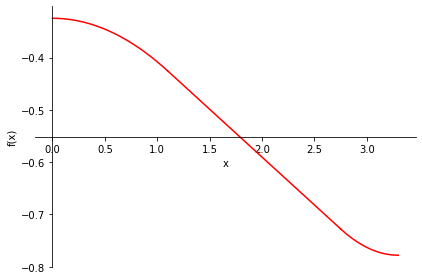

In [74]:
# Fuerza cortante en kN
x_array = nu.arange(0, Datos_viga["L4"] + 0.01, 0.01)

#Funcion de cada tramo (T)
T1 = sy.lambdify(x, Vx1)(x_array[x_array <= Datos_viga["L1"]])
T2 = sy.lambdify(x, Vx2)(x_array[(x_array > Datos_viga["L1"]) & (x_array <= (Datos_viga["L1"] + Datos_viga["L2"]))] - Datos_viga["L1"])
T3 = sy.lambdify(x, Vx3)(x_array[x_array >( Datos_viga["L1"] + Datos_viga["L2"]) - Datos_viga["L1"] - Datos_viga["L2"]])

Cort_y = nu.concatenate((T1, T2, T3))
sy.plot((Vx1, (x, 0, Datos_viga["L1"])), (Vx2.subs(x, x - Datos_viga["L1"]), (x, Datos_viga["L1"], Datos_viga["L1"] + Datos_viga["L2"])), (Vx3.subs(x, x - (Datos_viga["L1"] + Datos_viga["L2"])), (x, Datos_viga["L1"] + Datos_viga["L2"], Datos_viga["L4"])), line_color="red")


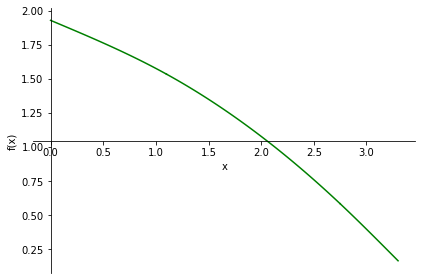

In [63]:
# Momento flector en kN-m
x_array = nu.arange(0, Datos_viga["L4"] + 0.01, 0.01)

#Funcion de cada tramo (T)
T1 = sy.lambdify(x, Mx1)(x_array[x_array <= Datos_viga["L1"]])
T2 = sy.lambdify(x, Mx2)(x_array[(x_array > Datos_viga["L1"]) & (x_array <= (Datos_viga["L1"] + Datos_viga["L2"]))] - Datos_viga["L1"])
T3 = sy.lambdify(x, Mx3)(x_array[x_array >( Datos_viga["L1"] + Datos_viga["L2"]) - Datos_viga["L1"] - Datos_viga["L2"]])

Momen_y = nu.concatenate((T1, T2, T3))
sy.plot((Mx1, (x, 0, Datos_viga["L1"])), (Mx2.subs(x, x - Datos_viga["L1"]), (x, Datos_viga["L1"], Datos_viga["L1"] + Datos_viga["L2"])), (Mx3.subs(x, x - (Datos_viga["L1"] + Datos_viga["L2"])), (x, Datos_viga["L1"] + Datos_viga["L2"], Datos_viga["L4"])), line_color="green")

# $ b).\  Momento\ interno \ máximo\ y\ máxima\ fuerza\ cortante\ .$

In [75]:
# Fuerza cortante máxima en kN
def obtener_maximo(valores_diagrama):
    Vmax_post = nu.amax(valores_diagrama)
    Vmax_negt = nu.amin(valores_diagrama)

    Vmax = Vmax_post
    if nu.absolute(Vmax_negt) > Vmax_post:
        Vmax = Vmax_negt
    
    posicion = x_array[nu.where(valores_diagrama == Vmax)][0]
    return Vmax, posicion

cortante_maximo, posicion_cortante_maximo = obtener_maximo(Cort_y)
print(f"El valor del cortante máximo es de {cortante_maximo} kN")
print(f"Se encuentra localizado a {posicion_cortante_maximo} metros desde el nodo A")


El valor del cortante máximo es de -0.7778174593052021 kN
Se encuentra localizado a 3.3000000000000003 metros desde el nodo A


In [77]:
# Momento flector en kN-m
momtmax = 0
momtmax_post = nu.amax(Momen_y)
momtmax_negt = nu.amin(Momen_y)

if nu.abs(momtmax_negt) > momtmax_post:
    Mmax = nu.abs(momtmax_negto)
else: 
    Mmax = momtmax_post

Mmax


1.93018636570717